In [8]:

import numpy as np
import pandas as pd


In [9]:
dataset = pd.read_csv('updated_test.csv')
dataset = dataset[ dataset['YEAR']>1980 ]
dataset = dataset.dropna()
X = dataset.iloc[:,[0,3,4,6,7]].values
y = dataset.iloc[:,5].values
global accuracies
accuracies=[]

In [10]:
#data pre-processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
print(X)
print(X[:, 0])
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
onehotencoder = OneHotEncoder(categorical_features = [0,1,3])
X = onehotencoder.fit_transform(X).toarray()
X = X[:,1:]
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

[['ANDAMAN & NICOBAR ISLANDS' 'Jan-Feb' 38.9 'Island' 'Tropical']
 ['ANDAMAN & NICOBAR ISLANDS' 'Mar-May' 366.7 'Island' 'Tropical']
 ['ANDAMAN & NICOBAR ISLANDS' 'Jun-Sep' 1908.0 'Island' 'Tropical']
 ...
 ['WEST UTTAR PRADESH' 'Mar-May' 95.9 'Hilly' 'Extremes']
 ['WEST UTTAR PRADESH' 'Jun-Sep' 436.1 'Hilly' 'Extremes']
 ['WEST UTTAR PRADESH' 'Oct-Dec' 11.9 'Hilly' 'Extremes']]
['ANDAMAN & NICOBAR ISLANDS' 'ANDAMAN & NICOBAR ISLANDS'
 'ANDAMAN & NICOBAR ISLANDS' ... 'WEST UTTAR PRADESH' 'WEST UTTAR PRADESH'
 'WEST UTTAR PRADESH']


In [4]:
#decidion-Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
onehotencoder = OneHotEncoder(categorical_features = [0])
y_train = np.reshape(y_train,(-1,1))
y_train = onehotencoder.fit_transform(y_train).toarray()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#normalization
#val-mean/n
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = DTclassifier.predict(X_test)
res_dt = np.argmax(y_pred_dt, axis=1)

global dt_score
dt_score = accuracy_score(y_test, res_dt)*100
print("DECISION-TREE ACCURACY:",dt_score)
accuracies.append(dt_score)

DECISION-TREE ACCURACY: 93.67541766109785


C:\Users\aksha\AppData\Roaming\Python\Python35\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
onehotencoder = OneHotEncoder(categorical_features = [0])
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
global lr_score
lr_score = lr.score(X_test, y_test)*100
print("LOGISTIC REGRESSION ACCURACY:", lr_score)
accuracies.append(lr_score)

LOGISTIC REGRESSION ACCURACY: 93.7947494033413


In [6]:
#SVM Model
from sklearn import svm
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
onehotencoder = OneHotEncoder(categorical_features = [0])
#y_train = np.reshape(y_train,(-1,1))
#y_train = onehotencoder.fit_transform(y_train).toarray()

# Feature Scaling
from sklearn.preprocessing import StandardScaler
#normalization
#val-mean/n
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test)
from sklearn import metrics
global svm_score
svm_score=metrics.accuracy_score(y_test, y_pred_svm)*100
print("SVM ACCURACY:",svm_score)
accuracies.append(svm_score)

SVM ACCURACY: 94.1527446300716


In [5]:
#ANN

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
onehotencoder = OneHotEncoder(categorical_features = [0])
y_train = np.reshape(y_train,(-1,1))
y_train = onehotencoder.fit_transform(y_train).toarray()
# Feature Scaling
from sklearn.preprocessing import StandardScaler
#normalization
#val-mean/n
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=32, input_dim=47, activation="relu", kernel_initializer="uniform"))
#uniform,zero,normal
# Adding the second hidden layer
classifier.add(Dense(units=16, activation="relu", kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(units=6, activation="softmax", kernel_initializer="uniform"))

# Compiling the ANN
#classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead


Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 1)

C:\Users\aksha\AppData\Roaming\Python\Python35\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/1
3349/3349 [==============================] - 0s - loss: 1.7247 - acc: 0.9030     


In [8]:
y_pred_ann = classifier.predict(X_test)
print(X_test.shape)
res_ann = np.argmax(y_pred_ann, axis=1)
from sklearn.metrics import accuracy_score
global a
a = accuracy_score(res_ann,y_test)
print('ANN Accuracy:', a*100)
accuracies.append(a)

(838, 47)
ANN Accuracy: 93.67541766109785


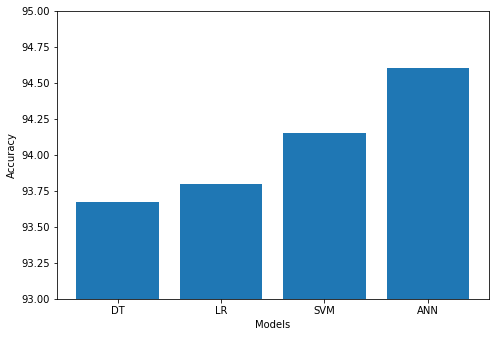

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(93, 95)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
langs = ['DT', 'LR', 'SVM', 'ANN']
students = [dt_score,lr_score,svm_score,94.6]
ax.bar(langs,students)
plt.show()